<a href="https://colab.research.google.com/github/IslamAbdelsalam/spam_filter/blob/main/IDB_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("SpamDataSet.csv", sep='\t', header=None)
data.head()

FileNotFoundError: ignored

(5572, 2)


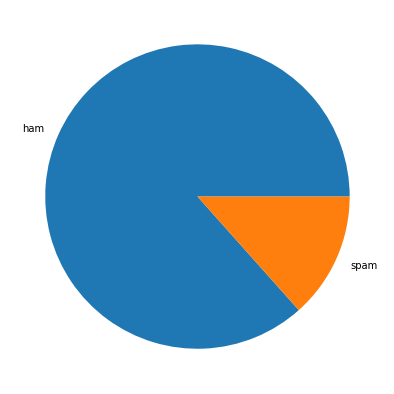

In [ ]:
data.columns = ['SorH', 'text']
y = data["SorH"]
X = data["text"]
print(data.shape)
data.isnull().any()


ham=data['SorH'].value_counts()['ham']
spam=data['SorH'].value_counts()['spam']
SH = [ham, spam]
my_labels = ['ham','spam']
fig = plt.figure(figsize =(10, 7))
plt.pie( SH,labels=my_labels)

plt.show()

In [ ]:
data.isnull().any()

SorH    False
text    False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
data_list = []
for text in X:
    # removing the symbols
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    text = text.translate(remove_punct_dict)
    # removing the numbers
    text = re.sub(r"[0-9]+"," ", text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Accuracy is : 0.9730861244019139


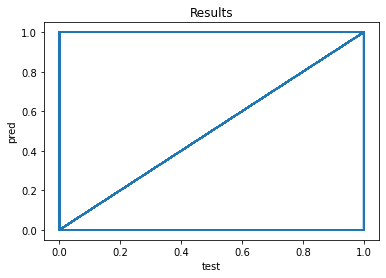

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print("Accuracy is :",ac)

plt.plot(y_test, y_pred)
plt.xlabel("test")
plt.ylabel("pred")
plt.title("Results")
plt.show()


In [ ]:
text = input("Please enter the text of the message: ")
x = cv.transform([text]).toarray()
message= model.predict(x)
message = le.inverse_transform(message)
print("The message is \""+ message[0]+"\"")


Please enter the text of the message: ham,I���m going to try for 2 months ha ha only joking,,,


NameError: ignored